##### Cell lines
- A172 - the brain tissue of a 53-year-old, male patient with glioblastoma
- BT-474 - a solid, invasive ductal carcinoma from a breast cancer patient
- BV-2 -  microglial cell derived from C57/BL6 murine.
- HuH-7 - epithelial-like, tumorigenic cells from liver tumor
- MCF7 - breast cancer
- SH-SY5Y -  neuroblastoma cell line from a metastatic bone tumor
- SkBr3 - breast cancer
- SK-OV-3 -  human ovarian cancer cell line with epithelial-like morphology. 

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pycocotools.coco import COCO
import skimage.io as io

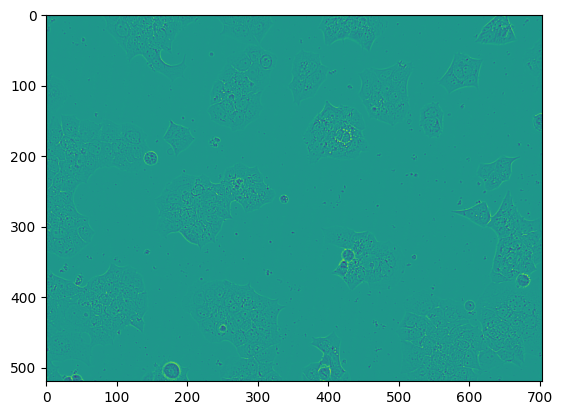

In [15]:
im = Image.open('/gpfs/space/projects/transformers_uss/livecell/images/livecell_test_images/BT474_Phase_D3_1_04d04h00m_3.tif')
plt.imshow(im)

In [2]:
im = Image.open('../data/livecell/A172_Phase_C7_1_00d00h00m_1.tif')
im.show()

In [16]:
imarray = np.array(im)

In [17]:
imarray.shape

(520, 704)


(eog:5995): EOG-WARNING **: 14:49:24.307: Thumbnail creation failed

(eog:5995): EOG-WARNING **: 14:49:24.663: Thumbnail creation failed


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([  3.  ,   5.52,   8.04,  10.56,  13.08,  15.6 ,  18.12,  20.64,
         23.16,  25.68,  28.2 ,  30.72,  33.24,  35.76,  38.28,  40.8 ,
         43.32,  45.84,  48.36,  50.88,  53.4 ,  55.92,  58.44,  60.96,
         63.48,  66.  ,  68.52,  71.04,  73.56,  76.08,  78.6 ,  81.12,
         83.64,  86.16,  88.68,  91.2 ,  93.72,  96.24,  98.76, 101.28,
        103.8 , 106.32, 108.84, 111.36, 113.88, 116.4 , 118.92, 121.44,
        123.96, 126.48, 129.  , 131.52, 134.04, 136.56, 139.08, 141.6 ,
        144.12, 146.64, 149.16, 151.68, 154.2 , 156.72, 159.24, 161.76,
        164.28, 166.8 , 169.32, 171.84, 174.36, 176.88, 179.4 , 181.92,
        184.44, 186.96, 189.48, 192.  , 194.52, 197.04, 199.56, 202.08,
        204.6 , 207.12, 209.64,

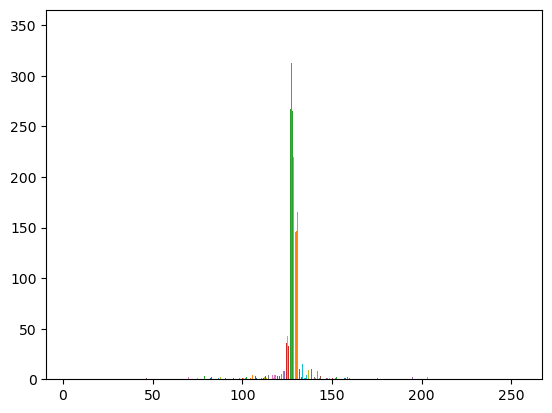

In [5]:
plt.hist(imarray, bins=100)

In [3]:
coco=COCO('../data/livecell/livecell_coco_test.json')

loading annotations into memory...
Done (t=6.17s)
creating index...
index created!


In [4]:
n = len(coco.dataset['images'])

In [5]:
n

1564

In [11]:
rnd_indx = set()
while len(rnd_indx) != 50:
    rnd_indx.add(np.random.randint(0, n))

In [12]:
subset_images = [img for i, img in enumerate(coco.dataset['images']) if i in rnd_indx]
subset_annotations = coco.loadAnns(coco.getAnnIds(imgIds=[img['id'] for img in subset_images]))

In [65]:
import json
subset = {'images': subset_images, 'annotations': subset_annotations}

with open('/gpfs/space/projects/transformers_uss/livecell/annotations/livecell_coco_test_random_500.json', 'w') as f:
    json.dump(subset, f)

In [13]:
import json
subset = {'images': subset_images, 'annotations': subset_annotations}

with open('livecell_coco_test_random_50.json', 'w') as f:
    json.dump(subset, f)

In [47]:
images = coco.loadImgs(coco.getImgIds())

In [50]:
images[

IndexError: list index out of range

In [ ]:
coco.loadAnns(coco.getAnnIds(imgIds=))

In [32]:
seg_masks.shape

AttributeError: 'list' object has no attribute 'shape'

In [41]:
seg_masks = [np.sum(np.array([coco.annToMask(obj) for obj in coco.loadAnns(coco.getAnnIds(imgIds=img['id']))]), axis=0) for img in images[:10]]
len(seg_masks)

2

In [45]:
np.concatenate(np.expand_dims(seg_masks, axis=0)).shape

(2, 520, 704)

In [ ]:
coco.loadAnns(coco.getAnnIds(imgIds=[images[np.random.randint(0,len(images))]['id']]))

In [27]:
imgIds = coco.getImgIds(imgIds = [1037607])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [23]:
anns

[]

In [28]:
# plt.imshow(im); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'])
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

0

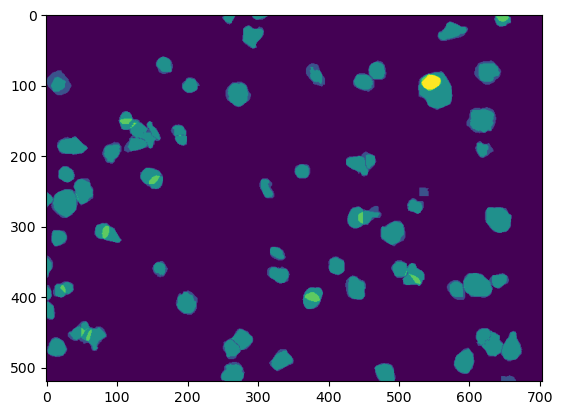

In [18]:
mask = np.sum(np.array([coco.annToMask(ann) for ann in anns]), axis=0)
plt.imshow(mask)

In [16]:
np.unique(mask)

array([0, 1, 2, 3, 4], dtype=uint8)